#Drug Classification Prediction

In [1]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

--2024-07-25 04:53:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2024-07-25 04:53:44 (1.94 GB/s) - ‘drug200.csv’ saved [5827/5827]



In [2]:
import pandas as pd

df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Cleaning Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [5]:
# define X
X = df.iloc[:, :-1].values
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [6]:
# define y
y = df['Drug']

####Encoding the data

In [7]:
# comvert categorical to numeric

#import encoder function from sklearn preprocessing library
from sklearn.preprocessing import LabelEncoder

#method 1
#Encoding sex
label_sex = LabelEncoder()
X[:, 1] = label_sex.fit_transform(X[:, 1])

#Method 2
'''
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex']) '''

#Encoding BP
label_BP = LabelEncoder()
X[:, 2] = label_BP.fit_transform(X[:, 2])

#Encoding Cholestrol
label_chol = LabelEncoder()
X[:, 3] = label_chol.fit_transform(X[:, 3])

X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [10]:
#Encoding Drug
label_Drug = LabelEncoder()
y = label_Drug.fit_transform(y) # On the code above we already define y = df['Drug']

In [14]:
y[:5]

array([4, 2, 2, 3, 4])

###**Building The Model**

##### Splitting Data (Train-Test)

In [15]:
#split train-test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

X_train.shape

(150, 5)

### Decision Tree Model


* Evaluation metrics used:
  * Accuracy Score
  * Confusion Matrix
  * Jaccard Score

##### Import Decision Tree fucntion from scikit-leran library

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

DS = DecisionTreeClassifier()

#training
DS.fit(X_train, y_train)

#prediction
y_hat = DS.predict(X_test)

#evaluation
print('The Accuracy Score is: ', accuracy_score(y_test, y_hat))
print ('')
print('The Confusion Matrix is: ')
print(confusion_matrix(y_test, y_hat))
print ('')
print('The Jaccard Score is: ', jaccard_score(y_test, y_hat, average='micro')) # Change average to 'micro'

The Accuracy Score is:  1.0

The Confusion Matrix is: 
[[ 4  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 21]]

The Jaccard Score is:  1.0


In the context of the Jaccard score (or Jaccard index) for multiclass classification, the average parameter specifies how the metric should be computed over multiple classes. The average='micro' approach is one of the methods to aggregate the scores.

**Micro-average:**

The micro-average method aggregates the contributions of all classes to compute the average metric. In other words, it treats each instance of a label equally, regardless of the class. This means that the score is computed globally across all classes by counting the total true positives, false negatives, and false positives.
It's particularly useful when you have imbalanced classes, as it gives equal weight to each instance.

### K-Nearest Neighbors (KNN) Model

* Evaluation metrics used:
  * Accuracy Score
  * Confusion Matrix
  * Precision
  * Recall
  * F1-score
  * Support

**Note:** the "K" value in K-Nearest Neighbors (KNN) is not considered an evaluation metric; it is a hyperparameter of the KNN algorithm

In [18]:
#predict

from sklearn.neighbors import KNeighborsClassifier

#the default parameter for KNeighborsClassifier() is 5 for if you want to change it you have to add the parameter
#KNeighborsClassifier(N=3)
neigh = KNeighborsClassifier()

#training
neigh.fit(X_train, y_train)

#prediction
y_hat = neigh.predict(X_test)

#evaluation
#here will use the accuracy score test
from sklearn.metrics import accuracy_score # import accuracy_score from sklearn.metrics
print('The accuracy is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy is:  64.0


[0.74 0.72 0.68 0.66 0.64 0.64 0.64 0.6  0.66 0.66 0.64 0.6  0.62 0.62
 0.64 0.66 0.66 0.7  0.68]




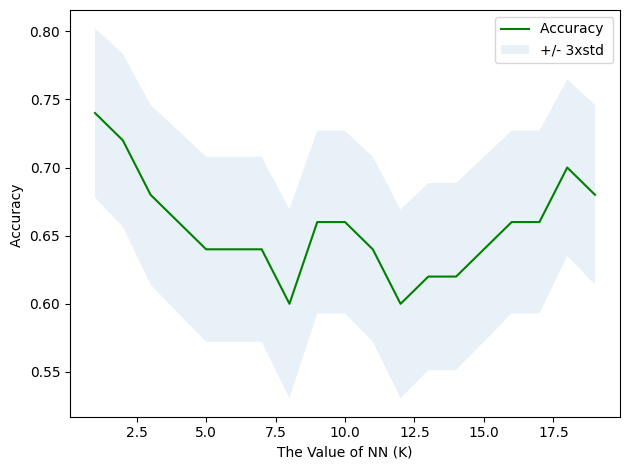



The best accuracy was with 0.74 with k= 1


In [19]:
#Model 1 KNN
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks =20 #change the k value here, then the loop will start
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)


    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

#print (mean_acc) (activate code ni kalau nak semua mean)
print(mean_acc)

print ('')
print ('')

#this is to plot the data
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)

print('The confusion matrix is= ')
print(cm)

print('')
print ('TP is ', cm[0][0])
print ('TN is ', cm[1][1])
print ('FP is ', cm[0][1])
print ('FN is ', cm[1][0])

The confusion matrix is= 
[[ 4  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 21]]

TP is  4
TN is  5
FP is  0
FN is  0


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### Support Vector Machine (SVM) Model

* Evaluation metrics used:
  * Accuracy Score

In [21]:
#modeling with SVM (RBF) For Model 1

#Import libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

#Create a SVM Classifier

SVM_drug = SVC() #If you don't add parameter it will run kernal as 'rbf'

#training
SVM_drug.fit(X_train, y_train)

#prediction
y_hat = SVM_drug.predict(X_test)

#evaluation
print ('The accuracy based on RBF kernal is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy based on RBF kernal is:  70.0


In [22]:
#modeling with SVM (Linear)

SVM_drug = SVC(kernel='linear') #If you don't add parameter it will run kernal as 'rbf'

#training
SVM_drug.fit(X_train, y_train)

#prediction
y_hat = SVM_drug.predict(X_test)

#evaluation
print ('The accuracy based on Linear kernal is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy based on Linear kernal is:  100.0


### Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score

SVM_drug = SVC()

mean_accuracy = cross_val_score(SVM_drug, X, y, cv=5, scoring='accuracy', verbose=2) #verbose is 0,1,2(2 is to see the process)

print('The total number of accuracy are: ', mean_accuracy)
print('')
print('The average of all is: ', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
The total number of accuracy are:  [0.75  0.7   0.725 0.65  0.7  ]

The average of all is:  70.49999999999999


In [26]:
from sklearn.model_selection import cross_val_score

SVM_drug = SVC(kernel ='linear')

mean_accuracy = cross_val_score(SVM_drug, X, y, cv=5, scoring='accuracy', verbose=2) #verbose is 0,1,2(2 is to see the process)

print('The total number of accuracy are: ', mean_accuracy)
print('')
print('The average of all is: ', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
The total number of accuracy are:  [1.    1.    1.    0.925 1.   ]

The average of all is:  98.5


**Conclusion:** Based on the accuracy score, the Decision Tree model is the best model for prediction with an accuracy score of 1.0 compared to KNN with 0.72 and SVM with 0.98 using RBF kernel and 0.96 using Linear kernel.